In [1]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 27.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation

/tmp/ipython-input-1896882839.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = Circle((lon, lat), radius=5, transform=ccrs.PlateCarree(), color="red", alpha=0.6,
/tmp/ipython-input-1896882839.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = Circle((lon, lat), radius=5, transform=ccrs.PlateCarree(), color="red", alpha=0.6,
/tmp/ipython-input-1896882839.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = Circle((lon, lat), radius=5, transform=ccrs.PlateCarree(), color="red", alpha=0.6,
/tmp/ipython-input-1896882839.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = Circle((lon, lat), radius=5, transform=ccrs.PlateCarree(), color="red", alpha=0.6,
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading

Animation successfully created.
MP4 saves as: plastic_pollution_animation.mp4
GIF saved as: plastic_pollution_animation.gif


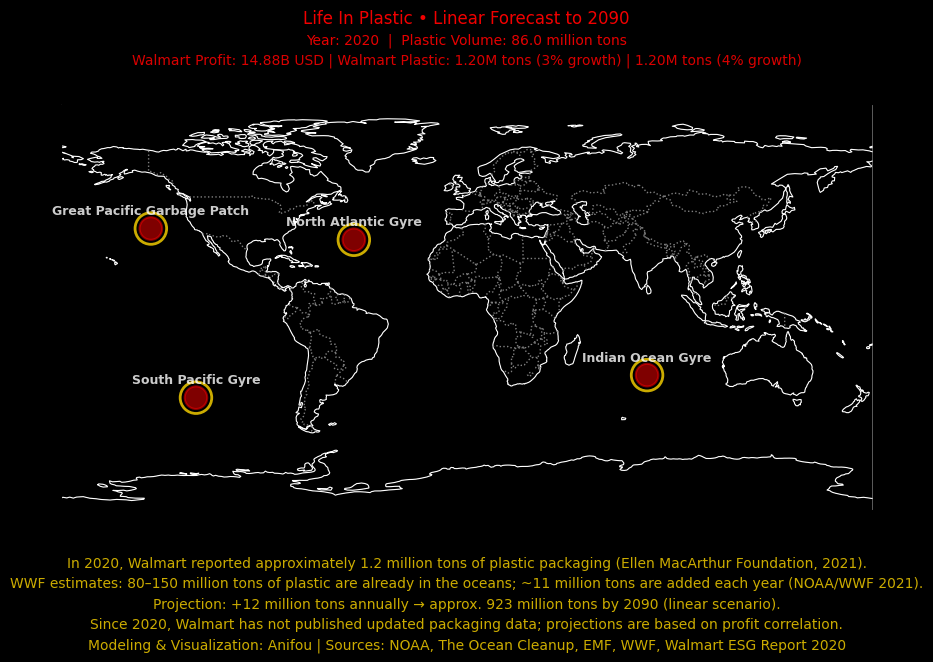

In [3]:
#real data (2020–2025)
real_years = np.array([2020, 2021, 2022, 2023, 2024, 2025])
real_total_plastic = np.array([86, 97, 108, 119, 131, 143])
real_walmart_plastic = np.array([1.2, 1.24, 1.28, 1.32, 1.36, 1.40])
walmart_profit_2020 = 14.88
profit_growth_rate = 0.03
plastic_growth_rate = 0.04

#timeline (2020–2090), simulation starts from 2026
years = np.arange(2020, 2091, 1)
total_plastic = np.concatenate((real_total_plastic, np.full(len(years) - len(real_years), np.nan)))
walmart_plastic_3 = np.concatenate((real_walmart_plastic, np.full(len(years) - len(real_years), np.nan)))
walmart_plastic_4 = np.concatenate((real_walmart_plastic, np.full(len(years) - len(real_years), np.nan)))
walmart_profit = np.full(len(years), np.nan)

for i in range(len(real_years), len(years)):
    total_plastic[i] = total_plastic[i - 1] + 12
    walmart_plastic_3[i] = walmart_plastic_3[i - 1] * (1 + profit_growth_rate)
    walmart_plastic_4[i] = walmart_plastic_4[i - 1] * (1 + plastic_growth_rate)
    walmart_profit[i] = walmart_profit_2020 * (1 + profit_growth_rate) ** (i - len(real_years) + 1)

#maps & hotspots
plastic_hotspots = {
    "Great Pacific Garbage Patch": (-140, 35),
    "North Atlantic Gyre": (-50, 30),
    "South Pacific Gyre": (-120, -40),
    "Indian Ocean Gyre": (80, -30),
}

fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={"projection": ccrs.PlateCarree()})
fig.patch.set_facecolor("black")
ax.set_global()
ax.add_feature(cfeature.LAND, facecolor="black")
ax.add_feature(cfeature.OCEAN, facecolor="black")
ax.add_feature(cfeature.COASTLINE, edgecolor="white", linewidth=0.8)
ax.add_feature(cfeature.BORDERS, edgecolor="gray", linestyle=":")
ax.set_position([0.1, 0.235, 0.8, 0.58])

circles, walmart_rings = [], []
for name, (lon, lat) in plastic_hotspots.items():
    circle = Circle((lon, lat), radius=5, transform=ccrs.PlateCarree(), color="red", alpha=0.6,
                    edgecolor="white", linewidth=1.5)
    ax.add_patch(circle)
    circles.append(circle)

    walmart_ring = Circle((lon, lat), radius=7, transform=ccrs.PlateCarree(), edgecolor="gold",
                          facecolor="none", linewidth=2, alpha=0.8)
    ax.add_patch(walmart_ring)
    walmart_rings.append(walmart_ring)

    ax.text(lon, lat + 5, name, transform=ccrs.PlateCarree(), fontsize=9, color="white", ha="center",
            va="bottom", fontweight="bold", alpha=0.8)

#title
ax.text(
    0.5, 1.20,
    "Life In Plastic • Linear Forecast to 2090",
    fontsize=12, fontweight="normal", color="red",
    transform=ax.transAxes, ha="center", alpha=0.95
)

title_text = ax.text(
    0.5, 1.15,
    "Year: 2020  |  Plastic Volume: 86.0 million tons",
    fontsize=10, fontweight="normal", color="red",
    transform=ax.transAxes, ha="center", alpha=0.9
)

profit_text = ax.text(
    0.5, 1.10,
    "Walmart Profit: 14.88B USD | Walmart Plastic: 1.20M tons (3% growth) | 1.20M tons (4% growth)",
    fontsize=10, fontweight="normal", color="red",
    transform=ax.transAxes, ha="center", alpha=0.85
)

#footer
fontsize_note = 10
ax.text(0.5, -0.14,
        "In 2020, Walmart reported approximately 1.2 million tons of plastic packaging (Ellen MacArthur Foundation, 2021).",
        fontsize=fontsize_note, color="gold", ha="center", transform=ax.transAxes, alpha=0.8)
ax.text(0.5, -0.19,
        "WWF estimates: 80–150 million tons of plastic are already in the oceans; ~11 million tons are added each year (NOAA/WWF 2021).",
        fontsize=fontsize_note, color="gold", ha="center", transform=ax.transAxes, alpha=0.8)
ax.text(0.5, -0.24,
        f"Projection: +12 million tons annually → approx. {total_plastic[-1]:.0f} million tons by 2090 (linear scenario).",
        fontsize=fontsize_note, color="gold", ha="center", transform=ax.transAxes, alpha=0.8)
ax.text(0.5, -0.29,
        "Since 2020, Walmart has not published updated packaging data; projections are based on profit correlation.",
        fontsize=fontsize_note, color="gold", ha="center", transform=ax.transAxes, alpha=0.8)
ax.text(0.5, -0.34,
        "Modeling & Visualization: Anifou"
        " | Sources: NOAA, The Ocean Cleanup, EMF, WWF, Walmart ESG Report 2020",
        fontsize=fontsize_note, color="gold", ha="center", transform=ax.transAxes, alpha=0.8)

#animation function
def animate(i):
    title_text.set_text(f"Year: {years[i]}  |  Plastic Volume: {total_plastic[i]:.1f} million tons")
    profit_display = f"{walmart_profit[i]:.2f}B USD" if not np.isnan(walmart_profit[i]) else "14.88B USD"
    profit_text.set_text(
        f"Walmart Profit: {profit_display} | Walmart Plastic: {walmart_plastic_3[i]:.2f}M tons (3% growth) | "
        f"{walmart_plastic_4[i]:.2f}M tons (4% growth)"
    )
    for j, circle in enumerate(circles):
        circle.set_radius(5 + (i / len(years)) * 25)
        circle.set_alpha(min(0.5 + (i / len(years)) * 0.8, 1))
    for j, walmart_ring in enumerate(walmart_rings):
        walmart_ring.set_radius(7 + (i / len(years)) * 25)
        if years[i] >= 2090:
            walmart_ring.set_alpha(0.8 if i % 2 == 0 else 0.2)
    return title_text, profit_text

#creating & saving animation
ani = FuncAnimation(fig, animate, frames=len(years), interval=100, blit=False)
from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=15, bitrate=1800)
ani.save("plastic_pollution_animation.mp4", writer=writer)
ani.save("plastic_pollution_animation.gif", writer="pillow", fps=15)

print("Animation successfully created.")
print("MP4 saves as: plastic_pollution_animation.mp4")
print("GIF saved as: plastic_pollution_animation.gif")
